In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('weight-height.csv')
df.shape

(10000, 3)

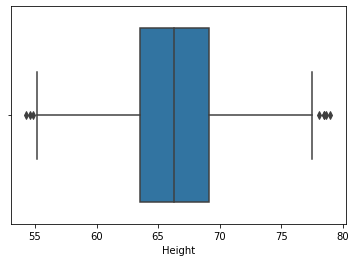

In [9]:
sns.boxplot(df['Height'])

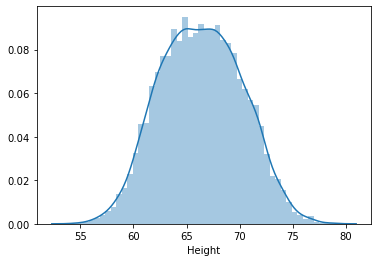

In [11]:
sns.distplot(df['Height'])

In [13]:
upper_limit = df['Height'].quantile(0.99)
lower_limit = df['Height'].quantile(0.01)
upper_limit,lower_limit

(74.7857900583366, 58.134411586716546)

In [14]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [28]:
#TRIMMING
 
new_df = df[(lower_limit <= df['Height']) & (df['Height'] <= upper_limit)]
new_df.shape

(9800, 3)

In [31]:
new_df['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

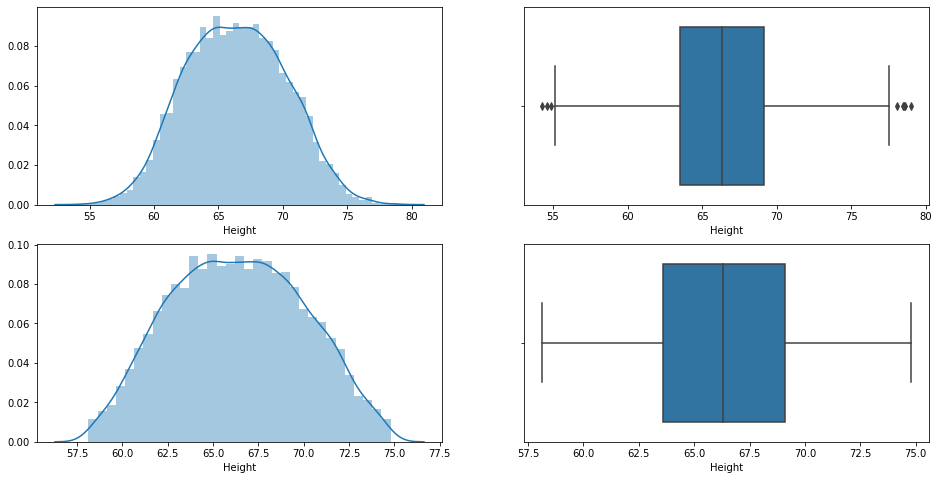

In [32]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Height'])

plt.subplot(2,2,2)
sns.boxplot(df['Height'])

plt.subplot(2,2,3)
sns.distplot(new_df['Height'])

plt.subplot(2,2,4)
sns.boxplot(new_df['Height'])

plt.show()

# CAPPING 
#### also called as winserisation

In [36]:
df['Height_capped']  = np.where(
                            lower_limit > df['Height'],
                            lower_limit,
                        np.where(
                            df['Height'] > upper_limit,
                                upper_limit,
                                df['Height']
                            )
                            )

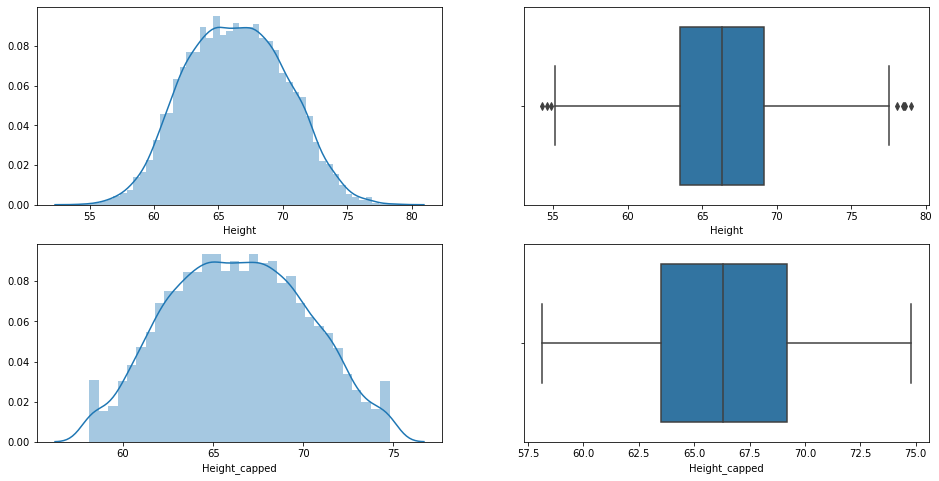

In [37]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Height'])

plt.subplot(2,2,2)
sns.boxplot(df['Height'])

plt.subplot(2,2,3)
sns.distplot(df['Height_capped'])

plt.subplot(2,2,4)
sns.boxplot(df['Height_capped'])

plt.show()

In [ ]:
df['Height_capped'].desc